<a href="https://colab.research.google.com/github/shrey1234/cmpe_258/blob/main/Assignment_1_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [1]:
#!pip install fastai==2.0
#import fastai
!pip install fastai --upgrade
from fastai.vision.all import *

Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (2.2.5)


#Image classification: cnn_learner

In [2]:
path = untar_data(URLs.PETS)/'images'

def is_dog(x): return x[0].islower()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_dog, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.125641,0.020092,0.004060,01:02


epoch,train_loss,valid_loss,error_rate,time
0,0.067760,0.011403,0.003383,01:14


In [4]:
uploader = SimpleNamespace(data = ['/content/drive/MyDrive/Colab Notebooks/258/assign1/dog.jpeg'])
img = PILImage.create(uploader.data[0])
is_dog,_,probs = learn.predict(img)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

Is this a dog?: True.
Probability it's a dog: 0.999999


#Segmentation-Unet learner

In [ ]:

path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.806046,1.787509,01:12


epoch,train_loss,valid_loss,time
0,1.510875,1.324165,01:20
1,1.378474,1.182755,01:21
2,1.318695,1.039309,01:21
3,1.204854,0.781473,01:21
4,1.086018,0.734468,01:20
5,0.985013,0.692298,01:21
6,0.905196,0.665018,01:22
7,0.841470,0.686480,01:21


epoch,train_loss,valid_loss,error_rate,time


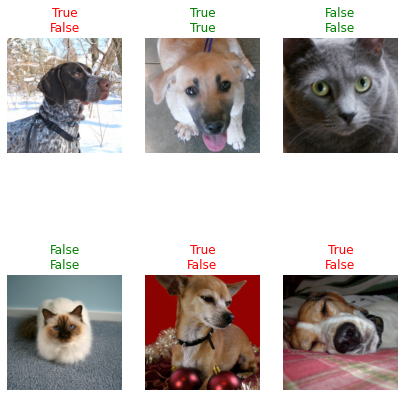

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

#Sentiment analysis- text_classifier_learner

In [ ]:

from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

In [ ]:
learn.predict("I really liked that movie!")

#Decision Tree- tabular_learner

In [ ]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(3)

#Ranking- collab_learner

In [ ]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

In [ ]:
learn.show_results()